In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [169]:
import scipy.stats as stats

In [170]:
pwd

'c:\\Users\\Harshvardhan Thakur\\OneDrive\\Desktop\\datasets'

In [171]:
df = pd.read_csv("Perinatal Risk Information-2.csv")

In [172]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Type
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [173]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   Type         1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [175]:
df['Type'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: Type, dtype: int64

In [176]:
df.isnull()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Type
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1009,False,False,False,False,False,False,False
1010,False,False,False,False,False,False,False
1011,False,False,False,False,False,False,False
1012,False,False,False,False,False,False,False


In [177]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
Type           0
dtype: int64

In [178]:
df.duplicated().sum()

562

In [179]:
df["Age"].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46],
      dtype=int64)

In [180]:
df.Age.value_counts()

23    71
19    67
17    63
15    60
35    50
25    48
32    48
22    45
50    43
29    40
21    38
40    37
55    37
12    35
60    34
30    30
28    28
48    26
42    23
20    22
31    22
18    19
16    16
54    12
13    12
27     9
49     9
45     9
37     6
33     5
34     5
43     5
10     4
36     4
39     4
24     3
65     3
44     3
14     3
26     3
63     2
38     2
59     2
62     1
51     1
66     1
56     1
70     1
41     1
46     1
Name: Age, dtype: int64

In [181]:
df["BodyTemp"].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [182]:
df.BodyTemp.value_counts()

98.0     804
101.0     98
102.0     66
100.0     20
103.0     13
99.0      10
98.4       2
98.6       1
Name: BodyTemp, dtype: int64

In [183]:
df["DiastolicBP"].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68], dtype=int64)

In [184]:
df.DiastolicBP.value_counts()

80     226
60     174
90     153
70     100
100     87
65      87
85      49
75      38
95      36
49      25
50      24
63       8
76       3
68       2
89       1
69       1
Name: DiastolicBP, dtype: int64

In [185]:
df["SystolicBP"].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78], dtype=int64)

In [186]:
df.SystolicBP.value_counts()

120    449
90     154
140    120
100     92
130     60
85      43
110     19
76      16
95      12
160     10
75       8
115      8
70       7
80       5
135      3
78       3
83       2
99       2
129      1
Name: SystolicBP, dtype: int64

In [187]:
df["BS"].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [188]:
df.BS.value_counts()

7.50     176
6.90     113
6.80      88
7.00      79
7.90      60
15.00     54
6.10      53
11.00     52
7.80      45
6.70      33
9.00      31
18.00     29
7.70      24
19.00     22
8.00      22
6.00      21
7.20      20
12.00     18
16.00     17
7.01      15
6.40      10
13.00      9
7.10       8
17.00      5
10.00      4
6.30       2
6.60       2
6.50       1
7.60       1
Name: BS, dtype: int64

In [189]:
df["HeartRate"].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7],
      dtype=int64)

In [190]:
df.HeartRate.value_counts()

70    271
76    131
80    117
77     96
66     87
60     74
88     59
86     55
78     46
90     19
82     19
75     19
67     12
65      5
68      2
7       2
Name: HeartRate, dtype: int64

In [191]:
df["Type"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [192]:
df.Type.value_counts()

low risk     406
mid risk     336
high risk    272
Name: Type, dtype: int64

<AxesSubplot:>

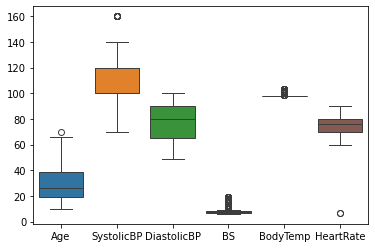

In [193]:
sns.boxplot(df)

<AxesSubplot:ylabel='HeartRate'>

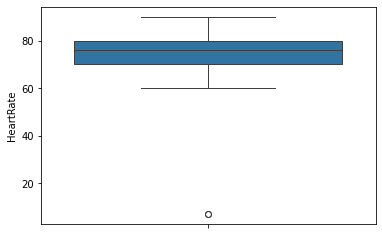

In [194]:
sns.boxplot(df["HeartRate"])

<AxesSubplot:ylabel='Age'>

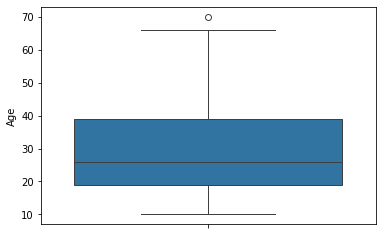

In [195]:
sns.boxplot(df["Age"])

<AxesSubplot:ylabel='SystolicBP'>

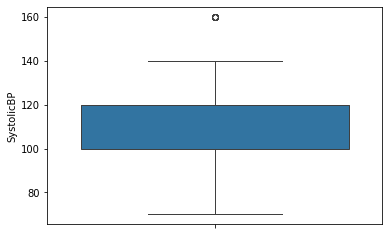

In [196]:
sns.boxplot(df["SystolicBP"])

<AxesSubplot:ylabel='DiastolicBP'>

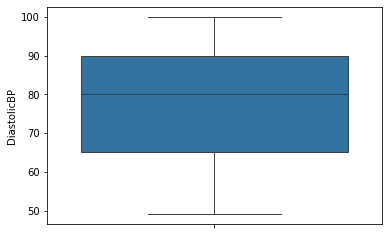

In [197]:
sns.boxplot(df["DiastolicBP"])

<AxesSubplot:ylabel='BodyTemp'>

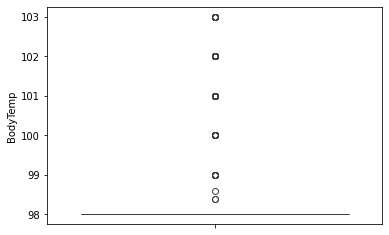

In [198]:
sns.boxplot(df["BodyTemp"])

<AxesSubplot:ylabel='BS'>

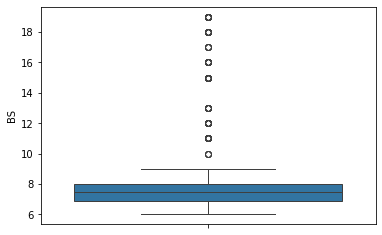

In [199]:
sns.boxplot(df["BS"])

<AxesSubplot:xlabel='BodyTemp', ylabel='Count'>

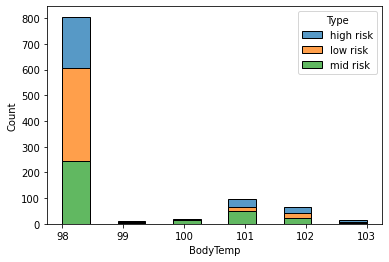

In [200]:
sns.histplot(df,x= "BodyTemp", hue = "Type", kde = False, multiple='stack',legend=True) #BodyTemp for each Type category
#

<AxesSubplot:xlabel='Age', ylabel='Count'>

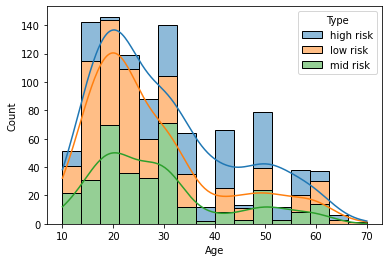

In [201]:
sns.histplot(df,x= "Age", hue = "Type", kde = True, multiple='stack',legend=True)

<AxesSubplot:xlabel='BS', ylabel='Count'>

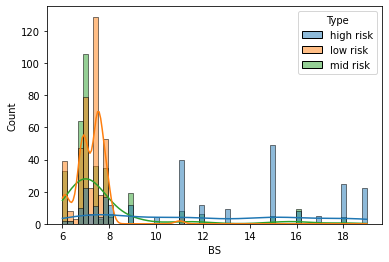

In [202]:

sns.histplot(df,x= "BS", hue = "Type", kde = True,legend=True)

<AxesSubplot:xlabel='SystolicBP', ylabel='Count'>

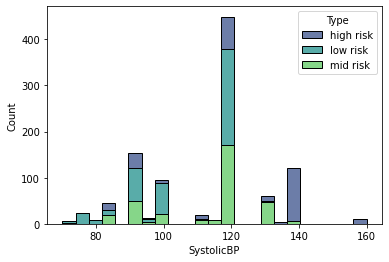

In [203]:
sns.histplot(df,x= "SystolicBP", hue = "Type", kde = False, multiple='stack',legend=True,palette="viridis")

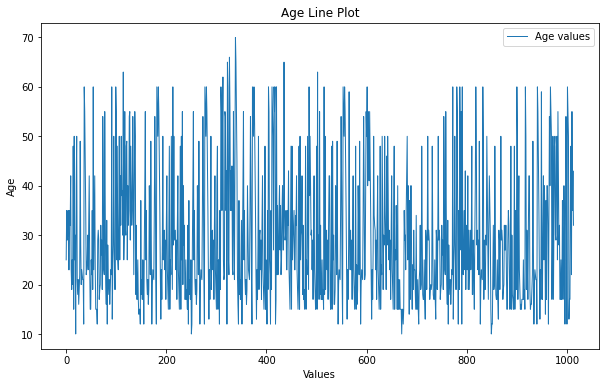

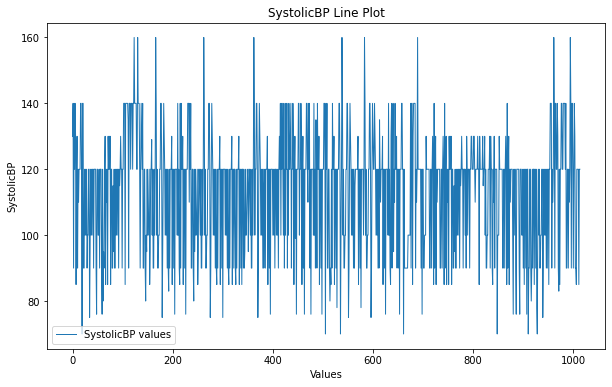

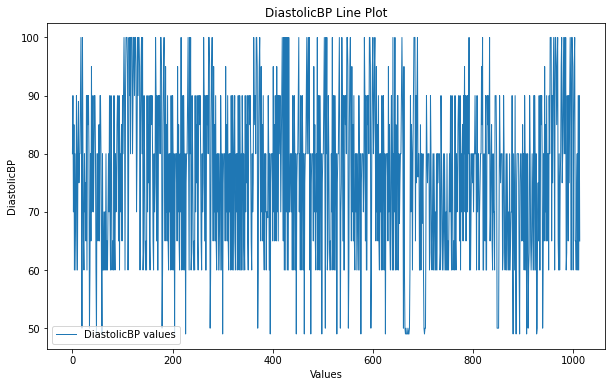

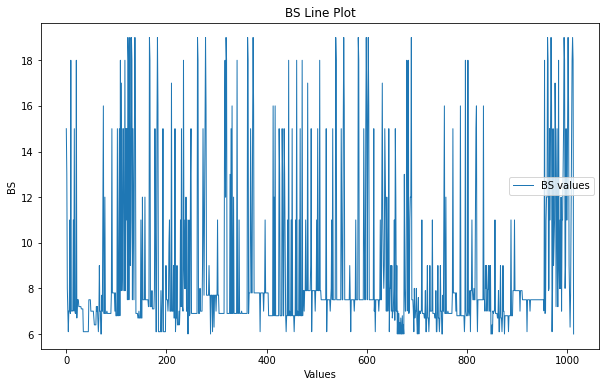

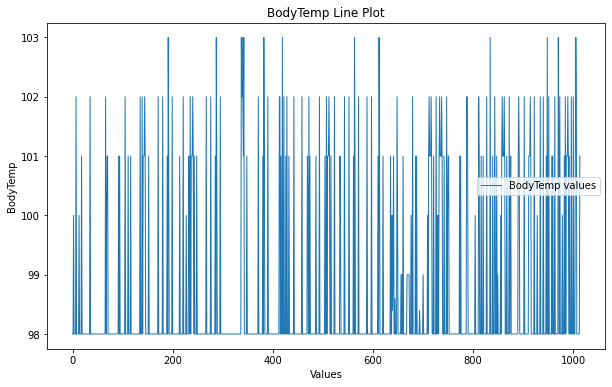

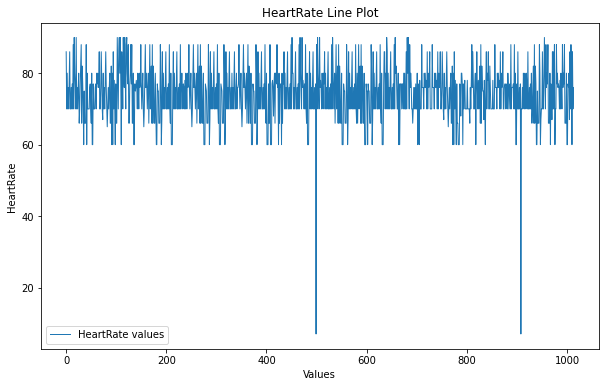

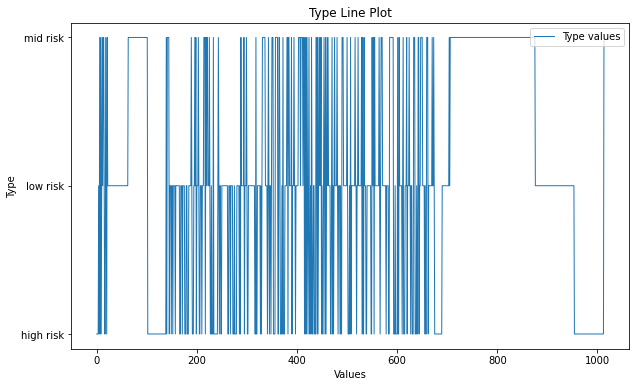

In [204]:
#Checking outliers using line graphs

def custom_graph(df):
    for column in df.columns:
        plt.figure(figsize=(10,6))
        plt.plot(df.index ,df[column], label=f'{column} values', linewidth=1)

        
        plt.title(f'{column} Line Plot')
        plt.xlabel('Values')
        plt.ylabel(column)
        plt.legend()

        plt.show()
custom_graph(df)

In [205]:
df.HeartRate.max()

90

In [206]:
df1= df.loc[:,df.columns!="Type"]

In [207]:
def check_outliers(df):
    outlier={}
    for column in df.columns:
            Q1=np.percentile(df[column],25)
            Q3=np.percentile(df[column],75)

            IQR= Q3-Q1
            lowb=   Q1-1.5*IQR
            uppb=Q3+1.5*IQR
            outliers= df[(df[column]<lowb) | (df[column]>uppb)]
            outlier[column]=outliers[column]

            print(f"Lower Bound:{lowb}, Upper Bound: {uppb}")
            print(f"Outliers detected:\n{outlier[column]}")
    return outlier


In [208]:
check_outliers(df1)

Lower Bound:-11.0, Upper Bound: 69.0
Outliers detected:
338    70
Name: Age, dtype: int64
Lower Bound:70.0, Upper Bound: 150.0
Outliers detected:
123    160
130    160
166    160
262    160
362    160
538    160
583    160
689    160
961    160
994    160
Name: SystolicBP, dtype: int64
Lower Bound:27.5, Upper Bound: 127.5
Outliers detected:
Series([], Name: DiastolicBP, dtype: int64)
Lower Bound:5.250000000000001, Upper Bound: 9.649999999999999
Outliers detected:
0       15.0
1       13.0
7       11.0
9       18.0
14      11.0
        ... 
1008    11.0
1009    15.0
1010    18.0
1011    19.0
1012    18.0
Name: BS, Length: 210, dtype: float64
Lower Bound:98.0, Upper Bound: 98.0
Outliers detected:
2       100.0
7       102.0
13      100.0
18      101.0
35      102.0
        ...  
1000    102.0
1004    101.0
1005    103.0
1006    102.0
1013    101.0
Name: BodyTemp, Length: 210, dtype: float64
Lower Bound:55.0, Upper Bound: 95.0
Outliers detected:
499    7
908    7
Name: HeartRate, dtype: i

{'Age': 338    70
 Name: Age, dtype: int64,
 'SystolicBP': 123    160
 130    160
 166    160
 262    160
 362    160
 538    160
 583    160
 689    160
 961    160
 994    160
 Name: SystolicBP, dtype: int64,
 'DiastolicBP': Series([], Name: DiastolicBP, dtype: int64),
 'BS': 0       15.0
 1       13.0
 7       11.0
 9       18.0
 14      11.0
         ... 
 1008    11.0
 1009    15.0
 1010    18.0
 1011    19.0
 1012    18.0
 Name: BS, Length: 210, dtype: float64,
 'BodyTemp': 2       100.0
 7       102.0
 13      100.0
 18      101.0
 35      102.0
         ...  
 1000    102.0
 1004    101.0
 1005    103.0
 1006    102.0
 1013    101.0
 Name: BodyTemp, Length: 210, dtype: float64,
 'HeartRate': 499    7
 908    7
 Name: HeartRate, dtype: int64}

In [209]:
print(df.dtypes)

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
Type            object
dtype: object


In [210]:
correlation_coefficient, p_value = stats.pearsonr(df['Age'], df['BodyTemp'])
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)
#-1 negative correlation.
#1 positive correlation.
#0 no correlation.
#p-value:A low p-value (typically less than 0.05); suggests a significance of correlation

Correlation coefficient: -0.25532313920501293
p-value: 1.4867935202133971e-16


In [211]:
correlation_coefficient, p_value = stats.pearsonr(df['Age'], df['SystolicBP'])
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation coefficient: 0.41604544797473286
p-value: 1.025502775260071e-43


In [212]:
correlation_coefficient, p_value = stats.pearsonr(df['SystolicBP'], df['DiastolicBP'])
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation coefficient: 0.7870064769775302
p-value: 1.7069405087813212e-214


In [213]:
cor_matrix=df.corr()
print(cor_matrix)  
#SystolicBP and DiastolicBP have strong correlation coefficient

                  Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
Age          1.000000    0.416045     0.398026  0.473284 -0.255323   0.079798
SystolicBP   0.416045    1.000000     0.787006  0.425172 -0.286616  -0.023108
DiastolicBP  0.398026    0.787006     1.000000  0.423824 -0.257538  -0.046151
BS           0.473284    0.425172     0.423824  1.000000 -0.103493   0.142867
BodyTemp    -0.255323   -0.286616    -0.257538 -0.103493  1.000000   0.098771
HeartRate    0.079798   -0.023108    -0.046151  0.142867  0.098771   1.000000


<AxesSubplot:xlabel='SystolicBP', ylabel='Count'>

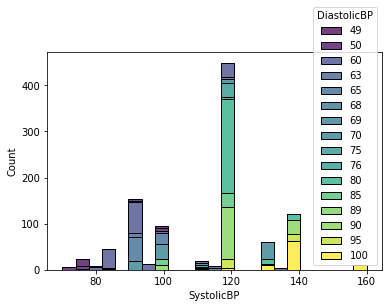

In [214]:
sns.histplot(df,x= "SystolicBP", hue = "DiastolicBP", kde = False, multiple='stack',legend=True,palette="viridis")

In [215]:
X= df.loc[:,df.columns!="Type"]


In [216]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Type
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [217]:
y= df["Type"]

In [218]:
y.head()

0    high risk
1    high risk
2    high risk
3    high risk
4     low risk
Name: Type, dtype: object

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=.20, random_state=1)


In [221]:
X_train, X_val, y_train, y_val= train_test_split(X_temp, y_temp, test_size=.20, random_state=1) 

In [222]:
#shapes of data
X_train.shape

(648, 6)

In [223]:
X_val.shape

(163, 6)

In [224]:
X_test.shape

(203, 6)

Decision tree

In [225]:
dt= DecisionTreeClassifier(criterion='gini',random_state=1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [226]:
TS_DT= dt.score(X_train,y_train)
print("Training Score:", TS_DT)

Training Score: 0.9243827160493827


In [303]:
VS_DT= dt.score(X_val,y_val)
print("Validation Score:", VS_DT)

Validation Score: 0.8098159509202454


In [304]:
TTS_DT=dt.score(X_test,y_test)
print("Testing Score:", TTS_DT)

Testing Score: 0.8226600985221675


In [228]:
y_pred_train=dt.predict(X_train)

In [311]:
y_pred_val= dt.predict(X_val)

In [314]:
y_pred_test= dt.predict(X_test)

In [230]:
y_pred_val

array(['high risk', 'low risk', 'low risk', 'low risk', 'high risk',
       'low risk', 'high risk', 'high risk', 'mid risk', 'high risk',
       'high risk', 'low risk', 'low risk', 'mid risk', 'low risk',
       'mid risk', 'mid risk', 'mid risk', 'high risk', 'mid risk',
       'mid risk', 'low risk', 'high risk', 'mid risk', 'mid risk',
       'high risk', 'high risk', 'low risk', 'mid risk', 'low risk',
       'mid risk', 'high risk', 'mid risk', 'low risk', 'mid risk',
       'high risk', 'low risk', 'mid risk', 'mid risk', 'low risk',
       'low risk', 'high risk', 'low risk', 'mid risk', 'low risk',
       'mid risk', 'mid risk', 'mid risk', 'mid risk', 'low risk',
       'mid risk', 'low risk', 'low risk', 'mid risk', 'high risk',
       'low risk', 'high risk', 'low risk', 'high risk', 'high risk',
       'high risk', 'mid risk', 'high risk', 'mid risk', 'low risk',
       'mid risk', 'mid risk', 'low risk', 'mid risk', 'low risk',
       'mid risk', 'low risk', 'mid risk', 

In [313]:
from sklearn.metrics import classification_report
print(f"Classification Report for Validation Data:\n{classification_report(y_val, y_pred_val)}")

Classification Report for Validation Data:
              precision    recall  f1-score   support

   high risk       0.91      0.89      0.90        46
    low risk       0.79      0.79      0.79        61
    mid risk       0.75      0.77      0.76        56

    accuracy                           0.81       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.81      0.81      0.81       163



In [315]:
print(f"Classification Report for Training Data:\n{classification_report(y_train, y_pred_train)}")

Classification Report for Training Data:
              precision    recall  f1-score   support

   high risk       0.90      0.98      0.94       163
    low risk       0.93      0.95      0.94       268
    mid risk       0.93      0.85      0.89       217

    accuracy                           0.92       648
   macro avg       0.92      0.93      0.92       648
weighted avg       0.93      0.92      0.92       648



In [316]:
print(f"Classification Report for Testing Data:\n{classification_report(y_test, y_pred_test)}")

Classification Report for Testing Data:
              precision    recall  f1-score   support

   high risk       0.88      0.92      0.90        63
    low risk       0.83      0.82      0.82        77
    mid risk       0.75      0.73      0.74        63

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



Random Forest

In [233]:
random_f = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=5)
random_f = random_f.fit(X_train, y_train)

In [234]:
TS=random_f.score(X_train, y_train)
print("Trainig Score:", TS)

Trainig Score: 0.9243827160493827


In [300]:
VS= random_f.score(X_val,y_val)
print("Validation Score:", VS)

Validation Score: 0.8159509202453987


In [302]:
TTS= random_f.score(X_test, y_test)
print("Testing Score:", TTS)

Testing Score: 0.8325123152709359


In [236]:
y_pred2_train= random_f.predict(X_train)

In [237]:
y_pred2_val= random_f.predict(X_val)

In [238]:
y_pred2_val

array(['high risk', 'low risk', 'low risk', 'low risk', 'high risk',
       'low risk', 'high risk', 'high risk', 'mid risk', 'high risk',
       'high risk', 'low risk', 'mid risk', 'mid risk', 'mid risk',
       'mid risk', 'mid risk', 'mid risk', 'high risk', 'mid risk',
       'mid risk', 'low risk', 'high risk', 'mid risk', 'mid risk',
       'high risk', 'high risk', 'low risk', 'mid risk', 'low risk',
       'mid risk', 'high risk', 'mid risk', 'low risk', 'mid risk',
       'high risk', 'low risk', 'mid risk', 'mid risk', 'low risk',
       'low risk', 'high risk', 'low risk', 'mid risk', 'low risk',
       'mid risk', 'mid risk', 'mid risk', 'mid risk', 'low risk',
       'mid risk', 'low risk', 'low risk', 'mid risk', 'high risk',
       'mid risk', 'high risk', 'mid risk', 'high risk', 'high risk',
       'high risk', 'mid risk', 'mid risk', 'low risk', 'low risk',
       'mid risk', 'mid risk', 'mid risk', 'low risk', 'low risk',
       'mid risk', 'low risk', 'mid risk', '

In [239]:
print(f"Classification Report for Training Data: \n{classification_report(y_train,y_pred2_train)}")

Classification Report for Training Data: 
              precision    recall  f1-score   support

   high risk       0.93      0.94      0.94       163
    low risk       0.94      0.94      0.94       268
    mid risk       0.90      0.89      0.90       217

    accuracy                           0.92       648
   macro avg       0.92      0.93      0.92       648
weighted avg       0.92      0.92      0.92       648



In [240]:
print(f"Classification Report for Validation Data:\n{classification_report(y_val,y_pred2_val)}")

Classification Report for Validation Data:
              precision    recall  f1-score   support

   high risk       0.97      0.85      0.91        46
    low risk       0.78      0.75      0.77        61
    mid risk       0.75      0.86      0.80        56

    accuracy                           0.82       163
   macro avg       0.83      0.82      0.82       163
weighted avg       0.82      0.82      0.82       163



In [241]:
#HYPERPARAMETER TUNING

from sklearn.model_selection import RandomizedSearchCV

In [280]:
param_dist = {
    'n_estimators': [100, 200, 350, 475],       
    'max_depth': [10, 20, 30, 40, None],     #None means no allowing tree to grow until no further splits can be made.      
    'min_samples_split': [2, 5, 10],                 
    'min_samples_leaf': [1, 2, 4],                   
    'bootstrap': [True, False],                      
    'max_features': ['auto', 'sqrt', 'log2']         
}


In [281]:
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                   param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, 
                                   random_state=42, n_jobs=-1)


In [287]:
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 350, 475]},
                   random_state=42, verbose=2)

In [288]:
print("Parameters for RandomSearch: ", random_search.best_params_)
print("Score for RandomSearch: ", random_search.best_score_)


Parameters for RandomSearch:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Score for RandomSearch:  0.7824074074074074


In [290]:
from sklearn.metrics import accuracy_score

In [291]:
best_rf = random_search.best_estimator_
y_pred_h1 = best_rf.predict(X_train)

# Evaluate accuracy 
accuracy = accuracy_score(y_train, y_pred_h1)
print("Training Accuracy: ", accuracy)


Training Accuracy:  0.9243827160493827


In [305]:
best_rf = random_search.best_estimator_
y_pred_h2 = best_rf.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred_h2)
print("Validation Accuracy: ", accuracy)

Validation Accuracy:  0.8343558282208589


In [320]:
best_rf = random_search.best_estimator_
y_pred_h3 = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_h3)
print("Testing Accuracy: ", accuracy)

Testing Accuracy:  0.8325123152709359


In [308]:
print(f"Random Forest Tuning Report:\n{classification_report(y_test, y_pred_h3)}")

Random Forest Tuning Report:
              precision    recall  f1-score   support

   high risk       0.88      0.92      0.90        63
    low risk       0.84      0.83      0.84        77
    mid risk       0.77      0.75      0.76        63

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203



In [318]:
#Model Comparison
report_dt=classification_report(y_test, y_pred_test, output_dict=True)
report_hrf=classification_report(y_test, y_pred_h3, output_dict=True)

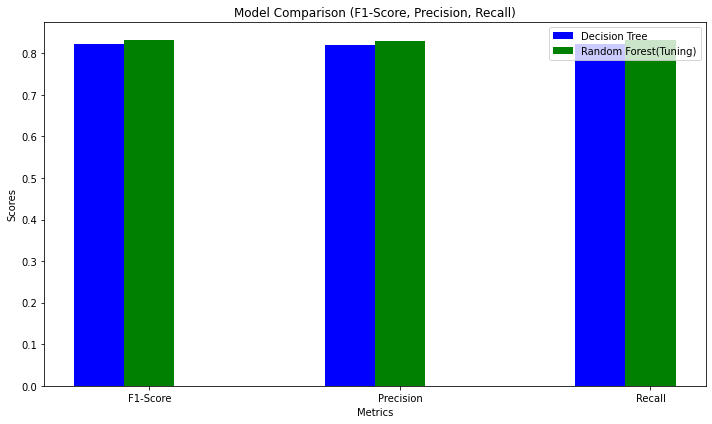

In [319]:
dt_f1=report_dt['macro avg']['f1-score']
rf_f1=report_hrf['macro avg']['f1-score']

dt_pre=report_dt['macro avg']['precision']
rf_pre=report_hrf['macro avg']['precision']

dt_recall=report_dt['macro avg']['recall']
rf_recall=report_hrf['macro avg']['recall']

metrics = ['F1-Score', 'Precision', 'Recall']
dt_scores = [dt_f1, dt_pre, dt_recall]
rf_scores = [rf_f1, rf_pre, rf_recall]

bar_width = 0.2
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))

plt.bar(index, dt_scores, bar_width, label='Decision Tree', color='blue')

plt.bar(index + bar_width, rf_scores, bar_width, label='Random Forest(Tuning)', color='green')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison (F1-Score, Precision, Recall)')
plt.xticks(index + bar_width, metrics)  # Set x-tick labels
plt.legend()

plt.tight_layout()
plt.show()